In [4]:
%load_ext lab_black

In [15]:
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
from
from jax import grad, vmap
from multipledispatch import dispatch

key = jr.PRNGKey(123)

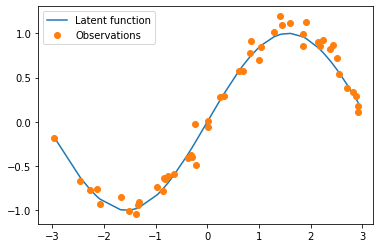

In [16]:
n = 50
x = jr.uniform(key, shape=(n,), minval=-3.0, maxval=3.0).sort()
signal = jnp.sin(x)
noise = jr.normal(key, signal.shape) * 0.1
y = signal + noise

plt.plot(x, signal, label="Latent function")
plt.plot(x, y, "o", label="Observations")
plt.legend(loc="best")

In [18]:
class Kernel(hk.Module):
    def __init__(self, name=None):
        self.name = name

    def __call__(self, x, y):
        K = jax.vmap(lambda x1: jax.vmap(lambda y1: func(x1, y1))(y))(x)

    def _k(self, x, y):
        raise NotImplementedError


class RBF(Kernel):
    def __init__(self, lengthscale=1.0, variance=1.0, name="SquaredExponential"):
        super().__init__(name)
        self.lengthscale = hk.get_parameter(
            "ell", shape=lengthscale.shape, init=lengthscale
        )
        self.variance = hk.get_parameter("sigma", shape=(1,), init=variance)
        self.feature_map = self._k()

    def _k(self):
        def fmap(x, y):
            tau = jnp.square(x - y)
            return jnp.square(kernel.variance) * jnp.exp(
                -tau / (2 * jnp.square(kernel.lengthscale))
            )

        return fmap

In [32]:
def rbf(lengthscale, variance=1.0):
    kernel = RBF(jnp.array(lengthscale), jnp.array(variance))
    return kernel(x, x)


kernel = hk.transform(rbf)

In [33]:
kernel.init(key, 1.0)

ValueError: The super constructor must be called before you create parameters or submodules.